In [7]:
# Notebook for visualizing the decision boundaries of different 
# classification models
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
iris = load_iris()
wine = load_wine()

In [8]:
X = iris.data[:, :2]

In [9]:
def visualize_boundary(classifier):
    disp = DecisionBoundaryDisplay.from_estimator(
    classifier, X, response_method='predict',
    xlabel=iris.feature_names[0], ylabel=iris.feature_names[1],
    alpha=0.5)
    disp.ax_.scatter(X[:, 0], X[:, 1], c=iris.target, edgecolor='k')
    plt.title(str(classifier))
    plt.show()

In [10]:
classifiers = [
    LogisticRegression(), KNeighborsClassifier(n_neighbors=15),
    LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(),
    SVC(), DecisionTreeClassifier(), MLPClassifier(max_iter=1000),
    GaussianNB()
]
def run_experiment():
    for classifier in classifiers:
        classifier.fit(X, iris.target)
        visualize_boundary(classifier)

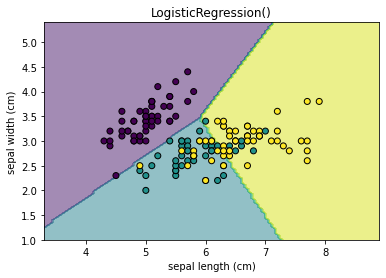

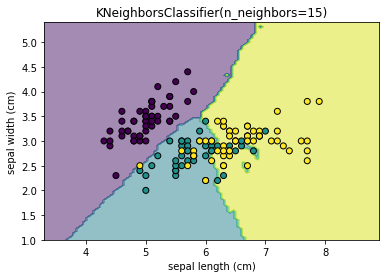

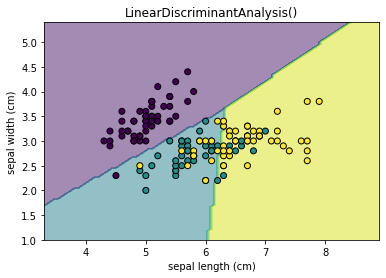

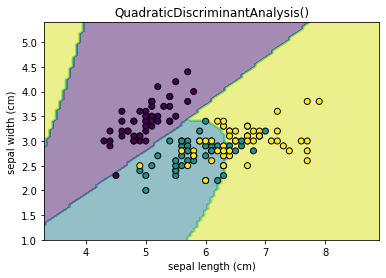

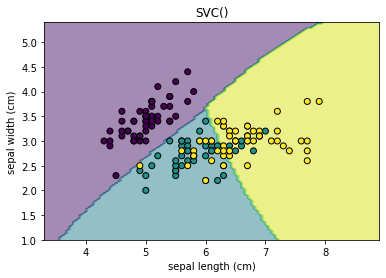

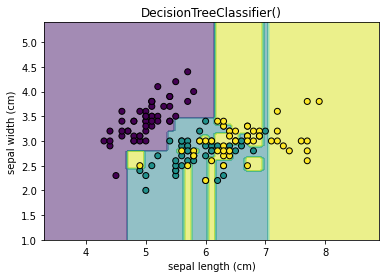

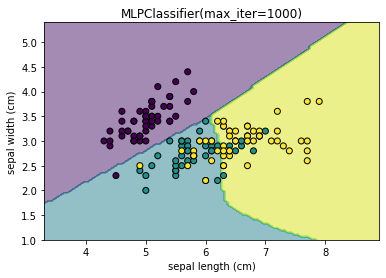

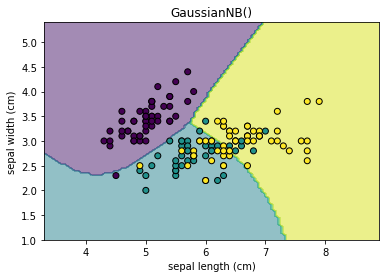

In [11]:
# Without even looking at errors, it seems that decision trees are probably 
# the worst class of models to use for this dataset.
# The boundary of the knn is probably too unstable with n_neighbors set to
# 1/10th of the entire training set.  Quadratic discriminant analysis is 
# probably unnecessary because the decision boundaries seem to be mostly 
# linear. The mlp classifier doesn't converge without tuning, and its 
# decision boundary seems to be sub-optimal.  The GaussianNB model looks ok 
# but possibly the deicison boundary between the yellow and green classes
# is not as good as certain other classifiers.  The other three models 
# seem like fine candidates for further tuning.
run_experiment()